# Дискаунты

### посмотрим на то как распределены покупки с дискаунтом по городам 
1) какую часть составляют товары с дискаунтом по городам?

2) какую долю среднего чека составляют позиции с дискаунтом?

3) какую долю среднего чека составляет дискаунт по этим позициям?

график показывающий какую долю от заказа составляют товары с дискаунтом по городам 
цвет означает суммарное количество товаров купленных в этом городе (аналогичный график с Москвой ниже) 

видно что если в городах берут юнилевер почти во всех городах его берт по дискаунту (то есть доля больше 0.5) 
к тому же можно заметить что в городах которых суммарное количество заказов бельше среднего (цвет ближе к желтому) эта доля меньше 

а в городах где заказывают не так много доля товаров юнилевера купленных с дискаунтом больше 0.7

In [94]:
px.bar(compare_disc.query('city!="Москва"').sort_values('perc_quan'), x = 'city',y ='perc_quan', 
       hover_data= ['summary_quan'], color = 'summary_quan')

из-за того что в Москве огромный перевес по всем параметрам она затмевает своим количеством заказов другие города 
но подтверждается предыдущий вывод о том что в крупных городах доля юнилевера купленного по скидке значительно меньше 

In [18]:
px.bar(compare_disc.sort_values('perc_quan'), x = 'city',y ='perc_quan', 
       hover_data= ['summary_quan'], color = 'summary_quan')

график аналогичный тому что выше но тут уже по оси Y отложена доля выручки за товары купленные по скидке

видно что доля в выручке у товаров с дискаунтом выше почти во всех городах 

но если рассмотреть на распределение цвета (которое тут уже означает суммарную выручку по городу за товары юнилевера) то чем больше выручка тем меньше доля товаров с дискаунтом в ней составляет (кроме больших городов в Сибири где эта доля все же выше чем 0.5)

In [19]:
px.bar(compare_disc.query('city!="Москва"').sort_values('perc_rev'), x = 'city',y ='perc_rev', 
       hover_data= ['summary_rev'], color = 'summary_rev')

График тот же самый что и выше но с Москвой (подтверждаются предыдущие выводы) 

In [20]:
px.bar(compare_disc.sort_values('perc_rev'), x = 'city',y ='perc_rev', 
       hover_data= ['summary_rev'], color = 'summary_rev')

доля именно дискаунта в чеке то есть грубо говоря разница между ценой за которую был куплен товар и изначальной ценой (до дискаунта) 

из этого графика можно сделать вывод что в городах где покупают не так много предпочитают покупать по огромному дискаунту (правая часть графика) 

в городах же где суммарное revenue повыше доля дискаунта значительно меньше (опять кстати среди относительно крупных покупателей выделяются города расположенные в сибири и на урале)  

In [21]:
px.bar(compare_disc.query('city!="Москва"').sort_values('discount_total'), x = 'city',y ='discount_total', 
       hover_data= ['summary_rev'], color = 'summary_rev')

то же что и выше но с МСК

In [22]:
px.bar(compare_disc.sort_values('discount_total'), x = 'city',y ='discount_total', 
       hover_data= ['summary_rev'], color = 'summary_rev')

теперь сравним среднее значение скидки между городами в которых покупают в основном товары со скидкой и в городах где товары со скидкой составляют долю меньше 0.5

средняя скидка по городам второй группы (где доля стоваров со скидкой меньше 0.5)

In [25]:
unilever.query('city in @city_not_like_disc & discount>0').avg_disc.mean()

44.52661684308196

первой группы

In [26]:
unilever.query('city in @city_like_disc & discount>0').avg_disc.mean()

51.28685306818673

проверим статистически отличие этих средних

ненормально распределены попробуем лишь интервалом

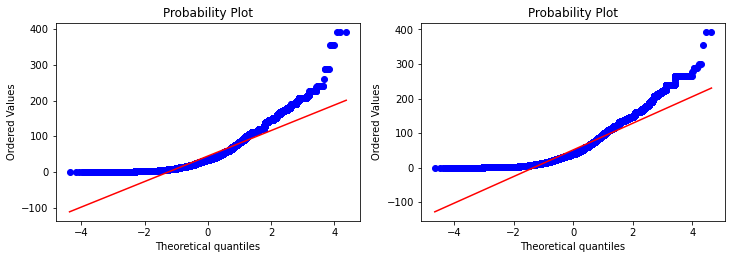

In [27]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(unilever.query('city in @city_not_like_disc & discount>0').avg_disc, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(unilever.query('city in @city_like_disc & discount>0').avg_disc, dist="norm", plot=pylab)
pylab.show()

как видно интервал не содержит 0 а это означает что в городах в которых товары любят покупать по дискаунту величина этой скидки выше чем в городах где доля товаров со скидкой меньше 0.5

In [96]:
print(cm.tconfint_diff(usevar='unequal'))

(-7.014345240263372, -6.5061272099469765)


посмотрим на статистику по дискаунту относительно юзеров 

видно что примерно 40% людей брали товары по скидке хотя бы раз 
при этом доля этих людей в выручке больше 55% а в количестве заказов примерно 45%

In [30]:
deep_disc(unilever)

процент людей что берут юнилевер только по скидке 0.38765515883488966
доля этих людей в выручке 0.5533455727155102
доля этих людейв количестве заказов 0.4561037410281518


приближенный график для понимания распределения количества заказов по скидкам с цветом показывающим ревенью

(важно! этот график не совсем корректный так как я тут округлял скидки до ближайшего десятка) 

можно сделать вывод что самая часто встречаемся скидка по заказам это 40% и ревенью по этим заказам так же самое высокое (среди всех скидок отличных от 0) 

теперь узнаем какие товары попали в несколько скидочных категорий то есть например товары которые есть и в 70% скидках и в 80%

хочется понять на что можно не ставить скидку например в 80% ведь можно продать и по 70% скидке или даже меньше

ниже товары которые попали в пересечение 

посмотрим на конкретные примеры 
"Крем-маска Черный Жемчуг BIO-Программа Восстановление ночной" по скидке 70% был куплен 33 раза а по скидке 80% - 8 раз (может тогда стоило оставить по 70% ведь покупали же нормально по такой скидке) 

а вот с "Шоколад Dove темный" иначя ситуация по скидкам в 70 и 80 % он был куплен примерно одинаковое количество раз  

In [34]:
d

{('Крем-маска Черный Жемчуг BIO-Программа Восстановление ночной', 70): 33,
 ('Крем-маска Черный Жемчуг BIO-Программа Восстановление ночной', 80): 8,
 ('Салфетки-антиперспирант Rexona Яркий букет 15 шт', 70): 5,
 ('Салфетки-антиперспирант Rexona Яркий букет 15 шт', 80): 3,
 ('Конфеты Magnat Cherry Charm пралине из темного шоколада с вишневым ликером 217 г',
  70): 1,
 ('Конфеты Magnat Cherry Charm пралине из темного шоколада с вишневым ликером 217 г',
  80): 1,
 ('Шоколад Dove молочный с фундуком и изюмом', 70): 1,
 ('Шоколад Dove молочный с фундуком и изюмом', 80): 4,
 ('Гель-пена Axe Gold 2 в 1 для душа и бритья с ароматом пряного перца и черной ванили 200 мл',
  70): 1,
 ('Гель-пена Axe Gold 2 в 1 для душа и бритья с ароматом пряного перца и черной ванили 200 мл',
  80): 2,
 ('Гель-пена Axe Copper 2 в 1 для душа и бритья с ароматом бергамота и сандалового дерева 200 мл',
  70): 1,
 ('Гель-пена Axe Copper 2 в 1 для душа и бритья с ароматом бергамота и сандалового дерева 200 мл',
  80)

можно еще эвристически попытаться определить к каким товарам наиболее лояльны пользователи 

то есть например если пользователь А купил твоар Б сначала по скидке то будет ли он потом покупать тот же товар но уже без скидки? 

самые популярные товары со скидкой и без в регионах

товары которые люди покупают не смотря на отсутствие скидки (к чему наиболее лояльны люди) топ 20

In [99]:
nazvanie.query('counted > 1').groupby(['product_name','counted','counted_ones'], as_index = False)\
.agg({'user_id':'nunique'}).sort_values(['user_id','counted_ones'], ascending = [False,True]).product_name.unique()[:20]

array(['Кетчуп Балтимор Адмирал', 'Соус Calve тартар для рыбы',
       'Холодный чай Lipton зеленый 2 л',
       'Кетчуп Calve с помидорами черри', 'Холодный чай Lipton лимон 2 л',
       'Чистящее средство Cif Power&Shine для ванной 500 мл',
       'Майонез Calve легкий 20%',
       'Крем-мыло Dove Красота и уход для тела 135 г',
       'Майонез Calve Классический 50%',
       'Мороженое Магнат Kisses шоколадный трюфель в шоколадной глазури 80 г бзмж',
       'Мороженое пломбир Московская Лакомка в шоколадной глазури 80 г бзмж',
       'Соус Calve майонезный легкий 20%', 'Соус Calve медово-горчичный',
       'Холодный чай Lipton зеленый 1,5 л', 'Кетчуп Calve Томатный',
       'Мороженое пломбир Чистая Линия Ваниль 450 г бзмж',
       'Мороженое пломбир Чистая Линия ваниль 110 г бзмж',
       'Мороженое пломбир Чистая Линия ваниль 80 г бзмж',
       'Мыло Чистая Линия косметическое Мята 90 г',
       'Смесь Knorr На второе шаурма по-домашнему'], dtype=object)

долю которая показана ниже следует понимать так 

доля пользователей каждый из которых имел в своих заказах один и тот же товар юнилевера и по скидке и без скидки и для которых не особо важно покупают они этот товар по дискаунту или нет 

(назовем это доля лояльных пользователей)

In [44]:
nazvanie.query('counted >= 1').user_id.unique().shape[0]/nazvanie.user_id.unique().shape[0]

0.5801337757412967

тут импликация не работает то есть про остальных 42% нельзя сказать важна для них скидка на товар при его покупке или нет 

к чему наименее лояльны пользователи 

важно понимать что товар может попасть и в категорию к чему более лояльны пользователи и к чему они наименее лояльны такое возможно если количество лояльных и нелояльных пользователей примерно равно 

на примере юнилевера это произошло с майонезом Calve

In [105]:
nazvanie.query('counted < 1').groupby(['product_name','counted','counted_ones'], as_index = False)\
.agg({'user_id':'nunique'}).sort_values(['user_id','counted_ones'], ascending = [False,True])\
.product_name.unique()[:20]

array(['Майонез Calve легкий 20%',
       'Чистящее средство Domestos универсальное Свежесть Атлантики 500 мл',
       'Чистящий крем Cif актив лимон универсальный для кухни 500 мл',
       'Мороженое пломбир Чистая Линия ваниль 80 г бзмж',
       'Кетчуп Балтимор Адмирал',
       'Крем-мыло Dove Красота и уход для тела 135 г',
       'Мороженое пломбир Чистая Линия Ваниль 450 г бзмж',
       'Чай черный Lipton Yellow Label в пакетиках 2 г 100 шт',
       'Жидкое крем-мыло Бархатные ручки Антибактериальный комплекс с маслом чайного дерева 240 мл',
       'Холодный чай Lipton зеленый 2 л',
       'Мороженое Магнат Kisses шоколадный трюфель в шоколадной глазури 80 г бзмж',
       'Мороженое Магнат Брюнетка грецкий орех с шоколадным топингом в шоколадно-ореховой глазури 82 г бзмж',
       'Соус Calve тартар для рыбы', 'Суп Knorr грибной с сухариками',
       'Кетчуп Calve Томатный',
       'Смесь Knorr На второе Картошка по-деревенски со сливочно-чесночным соусом',
       'Скраб Чистая Ли

проделаем то же самое но уже в разрезе количества покупок товаров брендов 

In [46]:
ttt_brands = unilever.groupby('deep_disc', as_index = False).agg({'brand_id':lambda x: set(x)})

In [47]:
k_brand,d_brand = inter(ttt_brands,70,80, column_name='brand_id')

сравним по дискаунтам какие бренды попали в скидки 70 и 80% (например) и посмотрим нужно ли было повышать скидку?

видно что для бренда 1771 можно было оставить дискаунт в размере 70 процентов так как повышение его не привело к какому-то огромному росту

In [48]:
d_brand

{(288, 70): 1,
 (288, 80): 1,
 (3490, 70): 1,
 (3490, 80): 1,
 (424, 70): 11,
 (424, 80): 3,
 (43, 70): 10,
 (43, 80): 1,
 (1771, 70): 21,
 (1771, 80): 3,
 (1773, 70): 11,
 (1773, 80): 3,
 (1806, 70): 1,
 (1806, 80): 4,
 (1807, 70): 2,
 (1807, 80): 2,
 (12376, 70): 1,
 (12376, 80): 1,
 (1786, 70): 40,
 (1786, 80): 8,
 (1758, 70): 51,
 (1758, 80): 20}

сравнение брендов к товарам которых пользователи лояльны более/менеее всего привело к тому что в топе оказались одни и те же бренды это означает что к их товарам различие пользователей по отношению к наличию и размеру дискаунта очень значительно

топ лояльных брендов

In [103]:
nazvanie_brands.query('counted > 1').groupby(['brand_id','counted','counted_ones'], as_index = False)\
.agg({'user_id':'nunique'}).sort_values(['user_id','counted_ones'], ascending = [False,True]).brand_id.unique()[:5]

array([  43,  424,  183, 1758, 1806])

бот лояльных брендов

In [106]:
nazvanie_brands.query('counted < 1').groupby(['brand_id','counted','counted_ones'], as_index = False)\
.agg({'user_id':'nunique'}).sort_values(['user_id','counted_ones'], ascending = [False,True]).brand_id.unique()[:5]

array([1806,   43,  424,  183, 1758])

# промо

сухая статистика по промо примененным к товарам юнилевера

In [59]:
stat_promo(unilever)

процент заказов с промо 0.3612915843487715
средний чек за товары бренда когда есть промо 189.1404798149086
средний чек за товары бренда когда нет промо 228.56463885217107
среднее количество товаров бренда когда есть промо 2.217839677777472
среднее количество товаров бренда когда нет промо 2.4246664210127515
уникальные юзеры восльзовавшиеся промо 142361
уникальные юзеры не восльзовавшиеся промо 210262


товары которые фигурируют в большинстве заказов по промо и их количество

можно заметить что люди любят мороженое покупать..... (не знаю что еще тут можно сказать)

In [60]:
unilever.query('promotion_id >1').groupby('product_name', as_index = False)\
        .agg({'line_item_id':'count','order_id':'nunique'}).sort_values(['line_item_id','order_id'])[-10:]

,product_name,line_item_id,order_id
800,Мороженое Магнат Манго Красные ягоды 74 г бзмж,2541,2504
856,Мороженое пломбир Чистая Линия ваниль 80 г бзмж,2873,2739
440,Кетчуп Балтимор Адмирал,2973,2961
1182,Холодный чай Lipton зеленый 2 л,2976,2968
437,Кетчуп Calve Томатный,2988,2982
797,Мороженое Магнат Kisses шоколадный трюфель в ш...,3229,3190
1390,Чистящее средство Domestos универсальное Свеже...,3263,3256
798,Мороженое Магнат Брюнетка грецкий орех с шокол...,3264,3225
1318,Чай черный Lipton Yellow Label в пакетиках 2 г...,3786,3781
710,Майонез Calve легкий 20%,4678,4676


товары к которым пользователи лояльны по отношению к промо

In [67]:
nazvanie_promos.query('counted > 1').groupby(['product_name','counted','counted_ones'], as_index = False)\
.agg({'user_id':'nunique'}).sort_values(['user_id','counted_ones'], ascending = False).product_name.unique()[:20]

array(['Майонез Calve легкий 20%', 'Холодный чай Lipton зеленый 2 л',
       'Мороженое пломбир Чистая Линия Ваниль 450 г бзмж',
       'Мороженое Магнат Kisses шоколадный трюфель в шоколадной глазури 80 г бзмж',
       'Холодный чай Lipton лимон 2 л', 'Шоколад Dove молочный',
       'Кетчуп Calve Томатный',
       'Мороженое Магнат Горький шоколад и апельсин 73 г бзмж',
       'Мороженое пломбир Московская Лакомка в шоколадной глазури 80 г бзмж',
       'Мороженое пломбир Чистая Линия Российское ваниль в шоколадной глазури 80 г бзмж',
       'Крем-мыло Dove Красота и уход для тела 135 г',
       'Майонез Calve Классический 50%', 'Кетчуп Балтимор Адмирал',
       'Соус Calve с лесными грибами', 'Кетчуп Calve с помидорами черри',
       'Мороженое Магнат Манго Красные ягоды 74 г бзмж',
       'Суп Knorr Чашка Супа томатный с сухариками по-итальянски',
       'Холодный чай Lipton зеленый 1,5 л',
       'Холодный чай Lipton персик 2 л',
       'Шоколад Dove молочный с целым фундуком'], dt

доля лояльных пользователей

In [68]:
nazvanie_promos.query('counted >= 1').user_id.unique().shape[0]/nazvanie_promos.user_id.unique().shape[0]

0.4917293233082707

наименее лольяны по отношению к промо

In [69]:
nazvanie_promos.query('counted < 1').groupby(['product_name','counted','counted_zeros'], as_index = False)\
.agg({'user_id':'nunique'}).sort_values(['user_id','counted_zeros'], ascending = [False,True])\
.product_name.unique()[:20]

array(['Майонез Calve легкий 20%',
       'Мороженое Магнат Kisses шоколадный трюфель в шоколадной глазури 80 г бзмж',
       'Холодный чай Lipton зеленый 2 л', 'Кетчуп Балтимор Адмирал',
       'Чай черный Lipton Yellow Label в пакетиках 2 г 100 шт',
       'Кетчуп Calve Томатный',
       'Мороженое пломбир Чистая Линия Ваниль 450 г бзмж',
       'Холодный чай Lipton лимон 2 л',
       'Мороженое Магнат Брюнетка грецкий орех с шоколадным топингом в шоколадно-ореховой глазури 82 г бзмж',
       'Крем-мыло Dove Красота и уход для тела 135 г',
       'Чистящее средство Domestos Эксперт сила 7 ультра белый для унитаза 1 л',
       'Мороженое Магнат Манго Красные ягоды 74 г бзмж',
       'Соус Calve с лесными грибами',
       'Мороженое пломбир Чистая Линия ваниль 80 г бзмж',
       'Чистящее средство Domestos универсальное Свежесть Атлантики 500 мл',
       'Кетчуп Calve с помидорами черри', 'Соус Calve тартар для рыбы',
       'Смесь Knorr На второе Картошка по-деревенски со сливочно-чес

## когорты

посмотрим на распределение лолей когорт в количестве заказов 

видно что почти по все бренды основной вклад вносят когорты 2020-05  2020-04 и 2020-03 (на текущий момент) 

In [71]:
cohort_brand(unilever,"2020-01-01", "2020-12-12", "2020-01")

средний чек за все время по городам за товары именно юнилевера

цвет означает количество заказов (на шкалу обращать внимания не стоит нужен только цвет так как шкала логарифмированная)

In [76]:
px.bar(coh.sort_values('rev_temp'), 
               x = 'city',y ='rev_temp', color = 'order_id')

ну вот тут колиечество заказов в правильном цвете (опять вся Москва блестит вся Москва горит)

In [78]:
px.bar(coh.sort_values('rev_temp'), 
               x = 'city',y ='rev_temp', color = 'order_id')

## корреляции

важно отметить что идейно можно использовать 3 подхода 

1) корреляция на уровне

2) корреляция на уровне брендов

3) корреляция на уровне городов

расположены по уменьшению значимости корреляции пункт (1) проверить невозможно (памяти банально не хватит так как надо будет таблица размером различных количество пар итемов из 22+ миллионов) уровень два у меня не получилось проверить так как памяти не хватило 
поэтому тут исполльзован 3 уровень корреляции



пример ниже для айди бренда юнилевера 43 

видно что корреляция наибольшая между брендом (не из юнилевера) 176 а наибольшая отрицательная с 27039 то есть не стоит делать кроссбрендовые акции со сторым брендом а вот с первым можно

In [90]:
correlation[[43]].sort_values(43, ascending = True).reset_index().query('brand_id not in @uni')

brand_id,brand_id,43
0,27039,-0.347987
1,27059,-0.290311
2,24933,-0.250722
3,22049,-0.217305
4,5065,-0.210011
...,...,...
6617,1713,0.974599
6618,0,0.976209
6619,1507,0.979430
6620,2475,0.979683


посмотрим на долю количества брендов юнилевера в общих заказах 

вроде картина не очень информативная посмотрим на относительные величины

In [125]:
fig = go.Figure(data=[
    go.Bar(name='all_Anoter', x=brr11.sort_values(['counted','is_uni'], ascending=False)['city'], y=brr11.sort_values(['counted','is_uni'], ascending=False).query('is_uni ==0').counted),
    go.Bar(name='unilever', x=brr11.sort_values(['counted','is_uni'], ascending=False)['city'], y=brr11.sort_values(['counted','is_uni'], ascending=False).query('is_uni ==1').counted)
])



# fig.update_layout(barmode='stack')

fig.show()

посмотрим на график где представлено соотношение по городам между долями бренда юнилевера и между максимальной долей товаров какого-то другого бренда

видно что слева представлены города в которых доля товаров юнилевера в заказах самая большая! 

при этом можно сказать что доля брендов юнилевера довольно большая почтим во всех городах

In [118]:
fig = go.Figure(data=[
    go.Bar(name='max_Anoter', x=final_new['city'], y=final_new.sort_values(['dolya', 'max_dolya'], ascending= [False, True]).max_dolya),
    go.Bar(name='unilever', x=final_new['city'], y=final_new.sort_values(['dolya', 'max_dolya'], ascending= [False, True]).dolya)
])

fig.add_trace(go.Scatter(x=for_plot_new.groupby('city', as_index = False)['dolya'].mean()['city'],
                         y=for_plot_new.groupby('city', as_index = False)['dolya'].mean()['dolya'],
                    line=dict(color='firebrick', width=4),
                    name='avg_counted',
                    ))

fig.update_yaxes(title_text="количество заказов")

fig.update_layout(barmode='stack')

fig.show()

средняя корзина пользователя который покупает юнилевера 

состав этой корзины 

In [127]:
sss


[1612, 2743, 4963, 287, 1713, 4329, 338, 22453, 288, 290, 43, 56, 4332, 11, 0]